![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [36]:
import warnings
#warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np

In [2]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [20]:
# Visualización datos de entrenamiento
dataTraining.head()

Unnamed: 0                track_id            artists  \
0           0  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1           1  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2           2  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3           3  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           4  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     1       0.0549      0.000058   
1     False         0.287  0.1900    7  ...     0       0.0370      0.930000   
2     False         0.583  0.5090    1  ...     1       0.0362      0.777000   
3     False         0.163  0.0368    8  ...     1       0.0472      0.991000   
4     False         0.647  0.9210    2  ...     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640   0.3200  141.793               4         goth   
1          0.000356    0.0834   0.1330   83.685               4        opera   
2          0.202000    0.1150   0.5440   90.459               3          idm   
3          0.899000    0.1070   0.0387   69.442               3    classical   
4          0.371000    0.1310   0.1710  137.981               4       techno   

  popularity  
0         22  
1         22  
2         37  
3          0  
4         27  

[5 rows x 21 columns]

In [21]:
# Visualización datos de test
dataTesting.head()

track_id                     artists  \
0  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  loudness  mode  speechiness  \
0     False         0.369   0.598    7    -6.984     1       0.0304   
1     False         0.171   0.997    7    -3.586     1       0.1180   
2     False         0.173   0.803    9   -10.071     0       0.1440   
3     False         0.683   0.511    6    -5.598     1       0.0279   
4     False         0.555   0.941    9    -3.294     0       0.0481   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0       0.00511          0.000000     0.176   0.0466  148.014               4   
1       0.00521          0.801000     0.420   0.0294  122.223               4   
2       0.61300          0.001910     0.195   0.0887   75.564               3   
3       0.40600          0.000197     0.111   0.5980  109.991               3   
4       0.48400          0.000000     0.266   0.8130   92.487               4   

   track_genre  
0  world-music  
1    grindcore  
2      iranian  
3         rock  
4       j-idol

In [41]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [42]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

Popularity
0   37.454012
1   95.071431
2   73.199394
3   59.865848
4   15.601864

### Librerías a importar

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [58]:
# Plots
def plot_histograms(dataframe):
    # Get the column names of the DataFrame
    columns = dataframe.columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()
    # Loop through each column and plot the histogram
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax, kde = True)
        ax.set_title(f'Histograma de {column}')
    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i])
    plt.show()

def plot_boxplots_vscat(dataframe,target):
    # Get the column names of the DataFrame
    columns = dataframe.select_dtypes(include=['number']).columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)  # Change 4 to 3
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 4 * num_rows), sharey='row')  # Change 4 to 3
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()

    # Loop through each column and plot the boxplot with hue
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.boxplot(x=dataframe[column], y=target, ax=ax)
        ax.set_title(f'Boxplot of {column}')

    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])
    plt.show()

### 1. Preprocesamiento de Datos [10 puntos]

In [82]:
dataTraining.head(3)

Unnamed: 0                track_id           artists        album_name  \
0           0  7hUhmkALyQ8SX9mJs5XI3D  Love and Rockets  Love and Rockets   
1           1  5x59U89ZnjZXuNAAlc8X1u  Filippa Giordano  Filippa Giordano   
2           2  70Vng5jLzoJLmeLu3ayBQq     Susumu Yokota            Symbol   

                               track_name  duration_ms  explicit  \
0                              Motorcycle       211533     False   
1  Addio del passato - From "La traviata"       196000     False   
2                      Purple Rose Minuet       216506     False   

   danceability  energy  key  ...  mode  speechiness  acousticness  \
0         0.305   0.849    9  ...     1       0.0549      0.000058   
1         0.287   0.190    7  ...     0       0.0370      0.930000   
2         0.583   0.509    1  ...     1       0.0362      0.777000   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640    0.320  141.793               4         goth   
1          0.000356    0.0834    0.133   83.685               4        opera   
2          0.202000    0.1150    0.544   90.459               3          idm   

  popularity  
0         22  
1         22  
2         37  

[3 rows x 21 columns]

#### Diccionario de Datos

| Campo              | Descripción                                                                                                                                                                                                                                                                     |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| track_id           | El ID único de la pista en Spotify.                                                                                                                                                                                                                                              |
| artists            | Los nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un punto y coma (;).                                                                                                                                                         |
| album_name         | El nombre del álbum en el que aparece la pista.                                                                                                                                                                                                                                 |
| track_name         | El nombre de la pista.                                                                                                                                                                                                                                                           |
| popularity         | La popularidad de la pista, un valor entre 0 y 100, donde 100 es la más popular. La popularidad se calcula por un algoritmo basado en el número total de reproducciones y la reciente actividad de estas reproducciones.                                                     |
| duration_ms        | La duración de la pista en milisegundos.                                                                                                                                                                                                                                         |
| explicit           | Indica si la pista tiene letras explícitas (true = sí; false = no o desconocido).                                                                                                                                                                                                |
| danceability       | Describe cuán adecuada es la pista para bailar, basada en una combinación de elementos musicales como tempo, estabilidad del ritmo, fuerza del beat y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es totalmente bailable.                                    |
| energy             | Un valor entre 0.0 y 1.0 que representa la intensidad y actividad perceptual de la pista. Las pistas más enérgicas suelen ser rápidas, ruidosas y activas, como el death metal.                                                                                             |
| key                | La tonalidad en la que se encuentra la pista. Los enteros corresponden a notas usando la notación estándar de Clases de Tonos (por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc.). Si no se detecta tonalidad, el valor es -1.                                                     |
| loudness           | La sonoridad general de la pista en decibelios (dB).                                                                                                                                                                                                                           |
| mode               | Indica la modalidad (mayor o menor) de la pista. 1 representa mayor, y 0 representa menor.                                                                                                                                                                                       |
| speechiness        | Detecta la presencia de palabras habladas en la pista. Valores cercanos a 1.0 indican que la pista es completamente hablada, como en los programas de radio o libros hablados. Valores entre 0.33 y 0.66 sugieren una mezcla de música y habla.                          |
| acousticness       | Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 indica alta confianza en que la pista es acústica.                                                                                                                                                          |
| instrumentalness   | Predice si una pista no contiene voces. Los valores cercanos a 1.0 indican una mayor probabilidad de que la pista sea instrumental.                                                                                                                                               |
| liveness           | Detecta la presencia de una audiencia en la grabación. Los valores altos de liveness indican una mayor probabilidad de que la pista sea grabada en vivo.                                                                                                                      |
| valence            | Una medida de 0.0 a 1.0 que describe la positividad musical de la pista. Las pistas con alto valence suenan más positivas (alegres, eufóricas), mientras que las de bajo valence tienden a sonar más negativas (triste, deprimida).                                         |
| tempo              | El tempo estimado de la pista
| time_signature     | Una firma de tiempo estimada, que indica cuántos tiempos hay en cada compás. Los valores varían entre 3 y 7, indicando firmas de tiempo como 3/4, 4/4, hasta 7/4.
| track_genre         | El género musical al que pertenece la pista.

In [60]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

In [83]:
dataTraining['track_name'].value_counts()

track_name
Run Rudolph Run              115
Halloween                     62
Christmas Time                59
Last Last                     59
Frosty The Snowman            53
                            ... 
Happy Hookers (Goes On..)      1
El Fuego Interno               1
You Wouldn't Know              1
Dark Days Dark Times           1
Back Then                      1
Name: count, Length: 55767, dtype: int64

In [84]:
dataTraining.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64

In [63]:
dataTesting.head(3)

track_id                     artists            album_name  \
0  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship         No Other Name   
1  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot        Grieving Birth   
2  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha  Noise A Noise 20.4-1   

              track_name  duration_ms  explicit  danceability  energy  key  \
0          No Other Name       440247     False         0.369   0.598    7   
1         Failed Organum        93933     False         0.171   0.997    7   
2  Save the Trees, Pt. 1       213578     False         0.173   0.803    9   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -6.984     1       0.0304       0.00511           0.00000     0.176   
1    -3.586     1       0.1180       0.00521           0.80100     0.420   
2   -10.071     0       0.1440       0.61300           0.00191     0.195   

   valence    tempo  time_signature  track_genre  
0   0.0466  148.014               4  world-music  
1   0.0294  122.223               4    grindcore  
2   0.0887   75.564               3      iranian

#### Preprocesamiento

In [5]:
cat_var = list(dataTraining.select_dtypes(include=['object']).columns)
cat_var

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [87]:
for cat in cat_var:
    print(cat, dataTraining[cat].nunique())

track_id 66720
artists 25775
album_name 37315
track_name 55767
track_genre 114


In [6]:
columns_to_drop = ['track_id', 'Unnamed: 0', 'album_name', 'track_name']
data = dataTraining.drop(columns=columns_to_drop)

In [7]:
# Test Preprocessing
columns_to_drop_t = ['track_id', 'album_name', 'track_name']
dataTesting = dataTesting.drop(columns=columns_to_drop_t)

In [8]:
# duplicate rows
duplicates = data[data.duplicated()]  
duplicate_count = duplicates.shape[0]

print("Number of duplicate rows:", duplicate_count)

#print(duplicates)

Number of duplicate rows: 4201


In [9]:
data = data.drop_duplicates()

In [92]:
dataTraining['track_genre'].value_counts()

track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
                    ... 
party                673
goth                 672
house                669
grindcore            666
idm                  658
Name: count, Length: 114, dtype: int64

In [10]:
# Creación de una nueva variable que cuenta el numero de artistas en una canción
data.loc[:, 'artist_count'] = data['artists'].str.count(';') + 1

In [11]:
# Test Preprocessing
dataTesting.loc[:, 'artist_count'] = dataTesting['artists'].str.count(';') + 1

In [12]:
# Convert boolean to int
data["explicit"] = data["explicit"].astype(int)
dataTesting["explicit"] = dataTesting["explicit"].astype(int)

In [246]:
data.describe().T

count           mean            std           min  \
duration_ms       75599.0  229631.361314  105604.787063  13386.000000   
explicit          75599.0       0.085186       0.279161      0.000000   
danceability      75599.0       0.565640       0.173374      0.000000   
energy            75599.0       0.642904       0.252382      0.000019   
key               75599.0       5.299687       3.557854      0.000000   
loudness          75599.0      -8.302400       5.069523    -49.307000   
mode              75599.0       0.634294       0.481631      0.000000   
speechiness       75599.0       0.085407       0.107240      0.000000   
acousticness      75599.0       0.313706       0.332750      0.000000   
instrumentalness  75599.0       0.163784       0.315594      0.000000   
liveness          75599.0       0.215017       0.192397      0.000000   
valence           75599.0       0.470061       0.259082      0.000000   
tempo             75599.0     122.276010      29.876970      0.000000   
time_signature    75599.0       3.902697       0.436688      0.000000   
popularity        75599.0      35.055662      21.527498      0.000000   
artist_count      75599.0       1.385309       0.859300      1.000000   

                          25%            50%          75%          max  
duration_ms       175666.0000  214450.000000  264026.0000  5237295.000  
explicit               0.0000       0.000000       0.0000        1.000  
danceability           0.4540       0.579000       0.6940        0.985  
energy                 0.4710       0.687000       0.8570        1.000  
key                    2.0000       5.000000       8.0000       11.000  
loudness             -10.0630      -7.056000      -5.0100        4.532  
mode                   0.0000       1.000000       1.0000        1.000  
speechiness            0.0360       0.049000       0.0847        0.965  
acousticness           0.0157       0.168000       0.5960        0.996  
instrumentalness       0.0000       0.000055       0.0688        1.000  
liveness               0.0981       0.132000       0.2770        1.000  
valence                0.2560       0.457000       0.6790        0.995  
tempo                 99.7005     122.043000     140.0850      222.605  
time_signature         4.0000       4.000000       4.0000        5.000  
popularity            20.0000      37.000000      51.0000      100.000  
artist_count           1.0000       1.000000       2.0000       38.000

In [74]:
#sns.pairplot(data, kind="scatter",diag_kind="kde")
#plt.show()

In [75]:
data['popularity'].info()

<class 'pandas.core.series.Series'>
Index: 75599 entries, 0 to 79799
Series name: popularity
Non-Null Count  Dtype
--------------  -----
75599 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


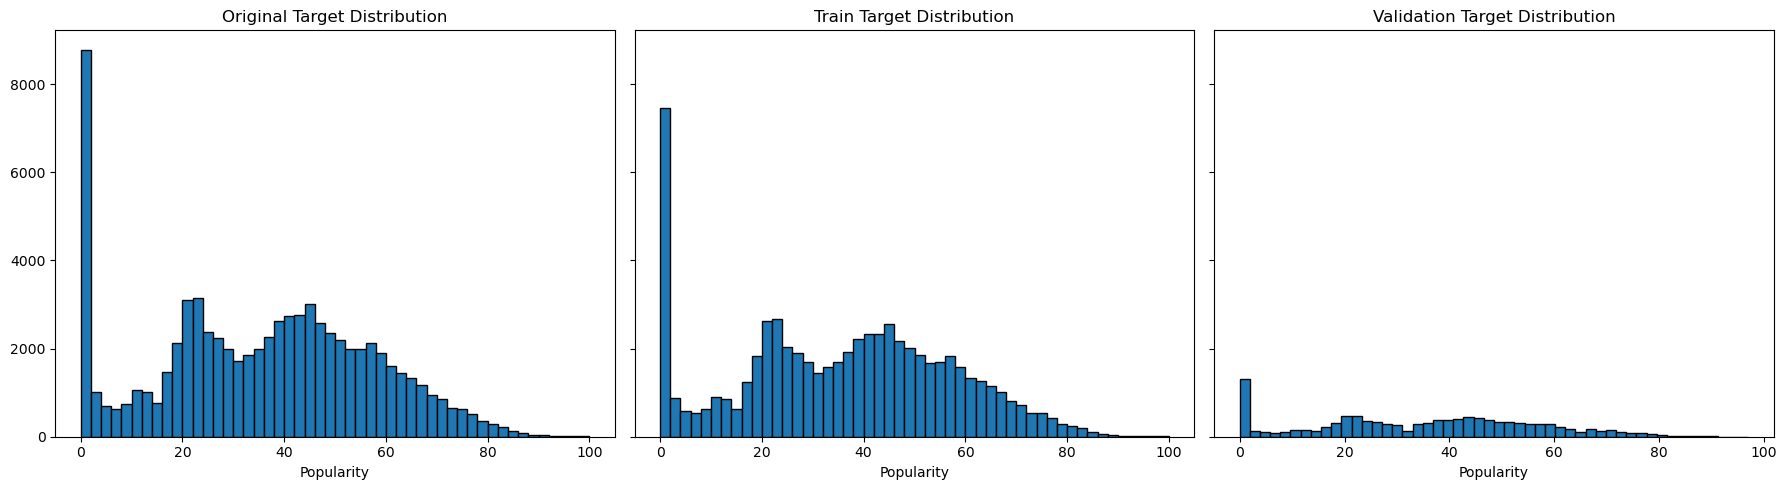

In [13]:
from sklearn.model_selection import train_test_split

# Split features and target
X = data.drop(columns='popularity')
y = data['popularity']

# Create bins for stratification (allow duplicate edges to be dropped)
y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')

# Stratified split using the bins
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.15, stratify=y_bins, random_state=42
)

# Plot histograms of target distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].hist(y, bins=50, edgecolor='k')
axes[0].set_title('Original Target Distribution')
axes[0].set_xlabel('Popularity')

axes[1].hist(y_train, bins=50, edgecolor='k')
axes[1].set_title('Train Target Distribution')
axes[1].set_xlabel('Popularity')

axes[2].hist(y_valid, bins=50, edgecolor='k')
axes[2].set_title('Validation Target Distribution')
axes[2].set_xlabel('Popularity')

plt.tight_layout()
plt.show()

In [14]:
X.select_dtypes(include=['object']).columns

Index(['artists', 'track_genre'], dtype='object')

#### Codificación de variables categóricas

In [15]:
from category_encoders import TargetEncoder

# Define categorical columns to encode
cat_cols = ['track_genre', 'artists', 'key', 'time_signature']

# Create a patched TargetEncoder class
class PatchedTargetEncoder(TargetEncoder):
    def __sklearn_tags__(self):
        return {"supervised_encoder": True}

# Now use the patched encoder
encoder = PatchedTargetEncoder(cols=cat_cols)


# Fit on X_train and y_train (original, not log-transformed)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_valid_encoded = encoder.transform(X_valid)
X_test_encoded = encoder.transform(dataTesting)


In [252]:
# Save the fitted encoder
import joblib
import os
os.makedirs("model", exist_ok=True)
joblib.dump(encoder, "model/target_encoder.pkl")


['model/target_encoder.pkl']

In [16]:
# y transformation
# Transform target
y_log=y_log = np.log1p(y)
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

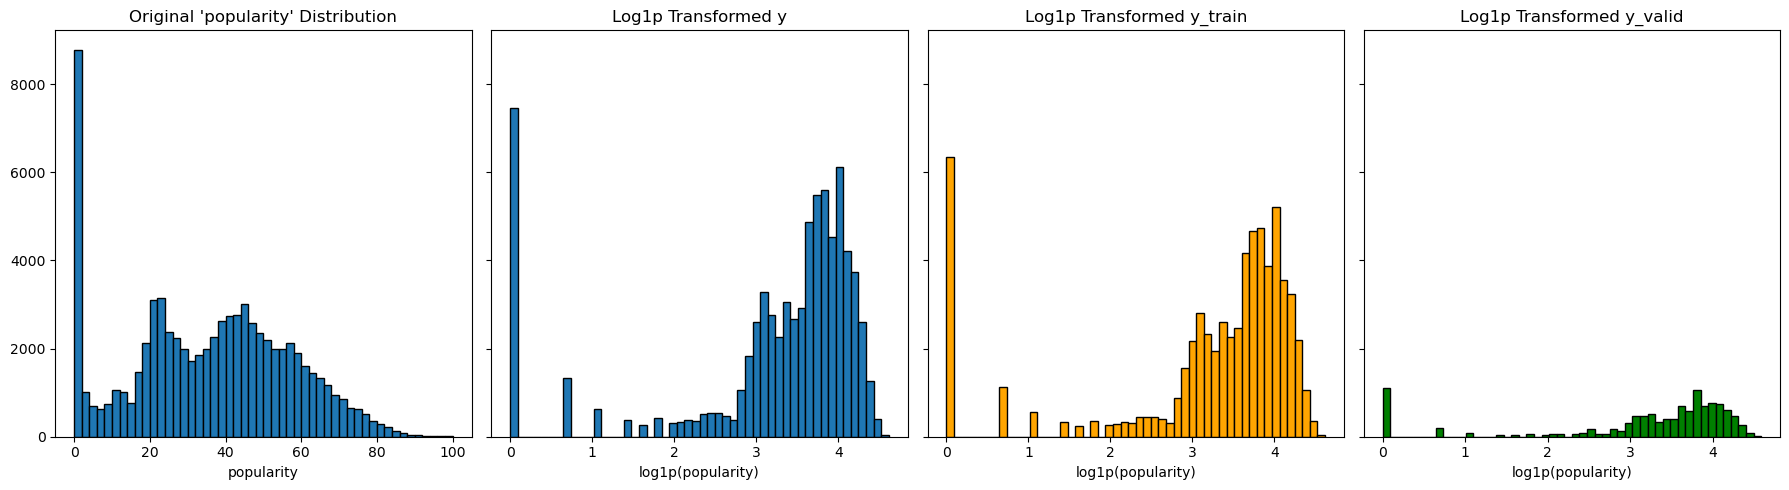

In [17]:
# Plot the distributions: original, y_log, y_train_log, y_valid_log
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

axes[0].hist(y, bins=50, edgecolor='k')
axes[0].set_title("Original 'popularity' Distribution")
axes[0].set_xlabel("popularity")

axes[1].hist(y_log, bins=50, edgecolor='k')
axes[1].set_title("Log1p Transformed y")
axes[1].set_xlabel("log1p(popularity)")

axes[2].hist(y_train_log, bins=50, edgecolor='k', color='orange')
axes[2].set_title("Log1p Transformed y_train")
axes[2].set_xlabel("log1p(popularity)")

axes[3].hist(y_valid_log, bins=50, edgecolor='k', color='green')
axes[3].set_title("Log1p Transformed y_valid")
axes[3].set_xlabel("log1p(popularity)")

plt.tight_layout()
plt.show()

### 2. Calibración de Modelo [15 puntos]

#### Random Forest Base Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Primera prueba para encontrar feature importances:  Train RandomForest on log1p(y)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_encoded, np.log1p(y_train))


RandomForestRegressor(n_jobs=-1, random_state=42)

In [20]:
# Predict and inverse-transform
from sklearn.metrics import mean_squared_error

y_pred_log_rf = rf.predict(X_valid_encoded)
y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluate RMSE
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
print(f"RF RMSE (on original scale): {rmse_rf:.4f}")

RF RMSE (on original scale): 16.5823


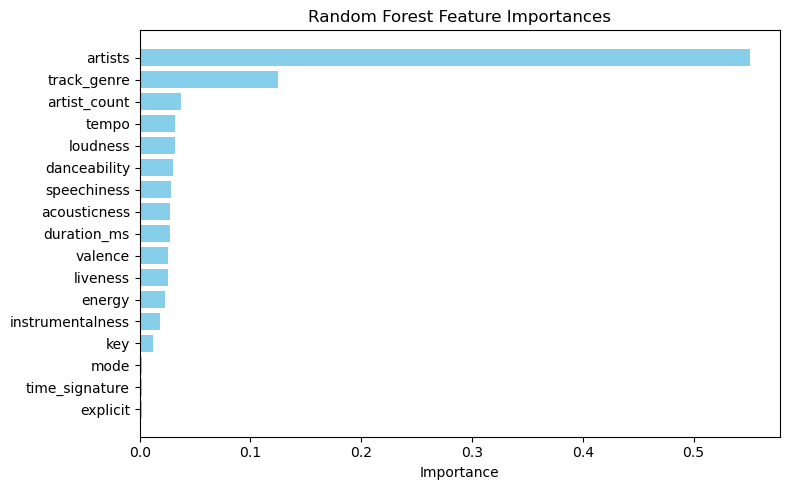

In [21]:
# Feature importance
importances = rf.feature_importances_
feature_names = X_train_encoded.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [22]:
feat_imp

Feature  Importance
2           explicit    0.001701
14    time_signature    0.001776
7               mode    0.002264
5                key    0.011911
10  instrumentalness    0.018268
4             energy    0.022962
11          liveness    0.025340
12           valence    0.025878
1        duration_ms    0.027525
9       acousticness    0.027561
8        speechiness    0.027792
3       danceability    0.030439
6           loudness    0.031615
13             tempo    0.032073
16      artist_count    0.037522
15       track_genre    0.124910
0            artists    0.550465

##### XGBoost Base Model

In [117]:
import xgboost as xgb

# Initialize and train XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Train on log-transformed target
xgb_model.fit(X_train_encoded, np.log1p(y_train))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [118]:
# Predict and inverse-transform
from sklearn.metrics import root_mean_squared_error

y_pred_log_xgb = xgb_model.predict(X_valid_encoded)
y_pred_xgb = np.expm1(y_pred_log_xgb)

# Evaluate RMSE
rmse_xgb = root_mean_squared_error(y_valid, y_pred_xgb)
print(f"XGBoost RMSE (on original scale): {rmse_xgb:.4f}")

XGBoost RMSE (on original scale): 17.0499


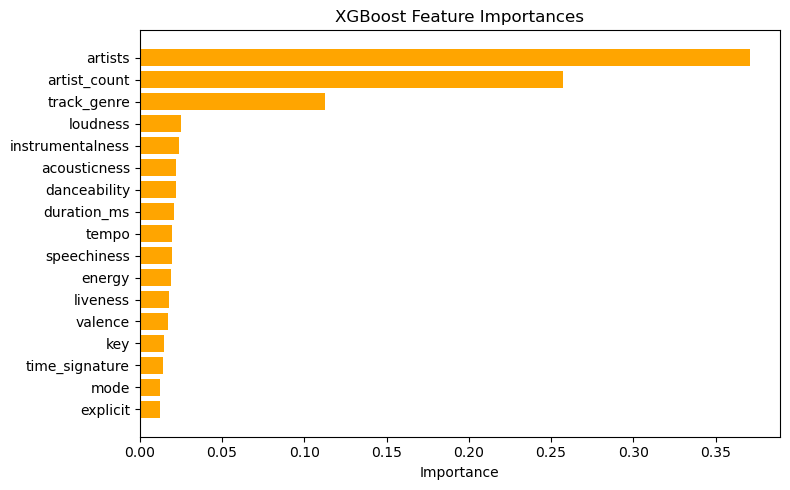

In [119]:
# Plot feature importances
importances = xgb_model.feature_importances_
feat_names = X_train_encoded.columns

sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 5))
plt.barh(feat_names[sorted_idx], importances[sorted_idx], color="orange")
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [123]:
import optuna

# Objective function for Optuna
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_encoded, np.log1p(y_train))

    y_pred_log = model.predict(X_valid_encoded)
    y_pred = np.expm1(y_pred_log)
    
    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [124]:
import time

# Start timer
start_time = time.time()
study = optuna.create_study(direction="minimize")
study.optimize(objective_xgb, n_trials=100, show_progress_bar=True)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for Optuna optimization: {elapsed_time:.2f} seconds")

[I 2025-04-20 19:55:25,986] A new study created in memory with name: no-name-6eda3063-3372-4a73-9b98-43cf44ccb18f


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-20 19:55:26,866] Trial 0 finished with value: 17.673759317204585 and parameters: {'n_estimators': 557, 'max_depth': 5, 'learning_rate': 0.19091374916483753, 'subsample': 0.5621058383042594, 'colsample_bytree': 0.6145821693957915, 'reg_alpha': 4.553688166460682, 'reg_lambda': 6.053266832041296}. Best is trial 0 with value: 17.673759317204585.
[I 2025-04-20 19:55:31,518] Trial 1 finished with value: 18.091280350150942 and parameters: {'n_estimators': 988, 'max_depth': 9, 'learning_rate': 0.2549978922203931, 'subsample': 0.585810878117351, 'colsample_bytree': 0.6334733478336554, 'reg_alpha': 4.339280529660748, 'reg_lambda': 9.67389220265215}. Best is trial 0 with value: 17.673759317204585.
[I 2025-04-20 19:55:35,828] Trial 2 finished with value: 17.533604052733033 and parameters: {'n_estimators': 367, 'max_depth': 12, 'learning_rate': 0.28174603588739516, 'subsample': 0.6686566946056351, 'colsample_bytree': 0.9646066176215429, 'reg_alpha': 2.8327904409980684, 'reg_lambda': 8.77

In [125]:
print("Best RMSE:", study.best_value)
print("Best hyperparameters:", study.best_params)

Best RMSE: 16.255368587456324
Best hyperparameters: {'n_estimators': 587, 'max_depth': 12, 'learning_rate': 0.05833263606114865, 'subsample': 0.818439440935681, 'colsample_bytree': 0.5697424610504738, 'reg_alpha': 1.9345419978991067, 'reg_lambda': 0.02768243192814315}


##### Retrain with weights and compare RMSE

In [130]:
from sklearn.utils.class_weight import compute_sample_weight
# Bin the target into quantiles
y_bins = pd.qcut(y_train, q=10, duplicates='drop')

# Compute balanced sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_bins)



In [131]:
# Train the model using the same best hyperparameters from Optuna
weighted_model = xgb.XGBRegressor(
    **study.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

# Fit with weights
weighted_model.fit(X_train_encoded, np.log1p(y_train), sample_weight=sample_weights)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5697424610504738, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05833263606114865, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=587, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [132]:

# Predict and evaluate
y_pred_log_weighted = weighted_model.predict(X_valid_encoded)
y_pred_weighted = np.expm1(y_pred_log_weighted)

# Evaluate RMSE
rmse_weighted = root_mean_squared_error(y_valid, y_pred_weighted)
print(f"Weighted XGBoost RMSE (on original scale): {rmse_weighted:.4f}")

Weighted XGBoost RMSE (on original scale): 16.2011


##### Optuna with Weights

In [134]:
def objective_xgb_weighted(trial):
    # Suggest parameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train_encoded, np.log1p(y_train), sample_weight=sample_weights)

    y_pred_log = model.predict(X_valid_encoded)
    y_pred = np.expm1(y_pred_log)

    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [135]:
start = time.time()
study_weighted = optuna.create_study(direction="minimize")
study_weighted.optimize(objective_xgb_weighted, n_trials=150, show_progress_bar=True)
end = time.time()
elapsed_time = end - start 
print(f"Elapsed time for Optuna optimization with weights: {elapsed_time:.2f} seconds")

[I 2025-04-20 20:23:56,127] A new study created in memory with name: no-name-557a0510-7c82-410d-bc78-7a6407b8a368


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-04-20 20:23:56,644] Trial 0 finished with value: 17.07302782104326 and parameters: {'n_estimators': 372, 'max_depth': 3, 'learning_rate': 0.04785216646974112, 'subsample': 0.8816479208398329, 'colsample_bytree': 0.982545923950758, 'reg_alpha': 7.613980799027258, 'reg_lambda': 9.567653460092625}. Best is trial 0 with value: 17.07302782104326.
[I 2025-04-20 20:23:57,333] Trial 1 finished with value: 17.07089690842668 and parameters: {'n_estimators': 382, 'max_depth': 4, 'learning_rate': 0.02225182481439429, 'subsample': 0.611907808615581, 'colsample_bytree': 0.543342313238531, 'reg_alpha': 1.557363933866085, 'reg_lambda': 9.185956593041006}. Best is trial 1 with value: 17.07089690842668.
[I 2025-04-20 20:24:02,887] Trial 2 finished with value: 18.784672861220734 and parameters: {'n_estimators': 836, 'max_depth': 10, 'learning_rate': 0.2654199496898621, 'subsample': 0.6297425850004121, 'colsample_bytree': 0.7302824508275405, 'reg_alpha': 1.6707254470639432, 'reg_lambda': 5.5372790

In [136]:
print(f"\n✅ Weighted Optuna Best RMSE: {study_weighted.best_value:.4f}")
print("Best hyperparameters (with weights):", study_weighted.best_params)


✅ Weighted Optuna Best RMSE: 16.0938
Best hyperparameters (with weights): {'n_estimators': 931, 'max_depth': 12, 'learning_rate': 0.01874797646218758, 'subsample': 0.5728989385298008, 'colsample_bytree': 0.8846028374435225, 'reg_alpha': 0.0012262906169102361, 'reg_lambda': 3.443068724411158}


##### Optuna with weights on y_train

In [137]:
def objective_xgb_raw(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_encoded, y_train)  # ← use raw y_train

    y_pred = model.predict(X_valid_encoded)

    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [138]:
import time
start_time = time.time()

study_raw = optuna.create_study(direction="minimize")
study_raw.optimize(objective_xgb_raw, n_trials=100, show_progress_bar=True)

end_time = time.time()


[I 2025-04-21 05:37:38,729] A new study created in memory with name: no-name-5f192f4d-2d20-4d92-8492-47a7e41e6a44


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-21 05:37:41,839] Trial 0 finished with value: 14.706468276846852 and parameters: {'n_estimators': 340, 'max_depth': 10, 'learning_rate': 0.1322355322810098, 'subsample': 0.9171694971662153, 'colsample_bytree': 0.9434064321075324, 'reg_alpha': 9.116582472068306, 'reg_lambda': 7.65772540410889}. Best is trial 0 with value: 14.706468276846852.
[I 2025-04-21 05:37:42,627] Trial 1 finished with value: 15.448852261401633 and parameters: {'n_estimators': 905, 'max_depth': 3, 'learning_rate': 0.21924268101805164, 'subsample': 0.9783747117695893, 'colsample_bytree': 0.5453531566426909, 'reg_alpha': 3.7684536802395896, 'reg_lambda': 7.688613645982013}. Best is trial 0 with value: 14.706468276846852.
[I 2025-04-21 05:37:43,728] Trial 2 finished with value: 14.859188365984934 and parameters: {'n_estimators': 385, 'max_depth': 7, 'learning_rate': 0.16355672210683972, 'subsample': 0.7928354244526983, 'colsample_bytree': 0.8747517084878247, 'reg_alpha': 3.0334407636135485, 'reg_lambda': 3.

In [139]:
print(f"Total time: {(end_time - start_time)/60:.2f} minutes")
print(f"\nRaw target Optuna RMSE: {study_raw.best_value:.4f}")
print("Best hyperparameters (no log):", study_raw.best_params)


Total time: 9.27 minutes

Raw target Optuna RMSE: 14.3891
Best hyperparameters (no log): {'n_estimators': 355, 'max_depth': 12, 'learning_rate': 0.04421922132959763, 'subsample': 0.9199720296687842, 'colsample_bytree': 0.5068772054504682, 'reg_alpha': 3.9696701038987157, 'reg_lambda': 5.569202790156825}


In [142]:
from sklearn.utils.class_weight import compute_sample_weight
import pandas as pd

# Bin y into quantiles
y_bins = pd.qcut(y_train, q=10, duplicates='drop')

# Compute balanced weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_bins)

# Optuna objective with raw target + sample weights
def objective_xgb_raw_weighted(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_encoded, y_train, sample_weight=sample_weights)

    y_pred = model.predict(X_valid_encoded)
    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [143]:
import time

start = time.time()
study_raw_weighted = optuna.create_study(direction="minimize")
study_raw_weighted.optimize(objective_xgb_raw_weighted, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start) / 60:.2f} minutes")

[I 2025-04-21 06:17:01,607] A new study created in memory with name: no-name-aeae3f70-b2f3-4048-9fc8-400880471d17


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-21 06:17:10,481] Trial 0 finished with value: 14.73138101528361 and parameters: {'n_estimators': 779, 'max_depth': 11, 'learning_rate': 0.04702106252598764, 'subsample': 0.8039507643443029, 'colsample_bytree': 0.9810366006202037, 'reg_alpha': 1.3155974668998827, 'reg_lambda': 2.6509845124171494}. Best is trial 0 with value: 14.73138101528361.
[I 2025-04-21 06:17:18,877] Trial 1 finished with value: 15.868720787852558 and parameters: {'n_estimators': 884, 'max_depth': 11, 'learning_rate': 0.20129289687539886, 'subsample': 0.5803934894770031, 'colsample_bytree': 0.8856745415479947, 'reg_alpha': 7.6267919982316, 'reg_lambda': 1.5014152772555012}. Best is trial 0 with value: 14.73138101528361.
[I 2025-04-21 06:17:20,133] Trial 2 finished with value: 14.908268422739068 and parameters: {'n_estimators': 655, 'max_depth': 6, 'learning_rate': 0.20517320983167198, 'subsample': 0.559825504246686, 'colsample_bytree': 0.6038864777072865, 'reg_alpha': 0.004475747583816414, 'reg_lambda': 2

In [144]:
print(f"\n Weighted Optuna RMSE (raw target): {study_raw_weighted.best_value:.4f}")
print("Best hyperparameters (with weights):", study_raw_weighted.best_params)


✅ Weighted Optuna RMSE (raw target): 14.3294
Best hyperparameters (with weights): {'n_estimators': 911, 'max_depth': 12, 'learning_rate': 0.015304080470964711, 'subsample': 0.775577125871359, 'colsample_bytree': 0.5107545718625804, 'reg_alpha': 4.207321603919812, 'reg_lambda': 2.5423313538285894}


##### Training and Test Prediction with Weighted Optuna XGBoost


#### Primera definición X-full/y_full

In [255]:
# === Step 1: Prepare full training data ===
X_full = pd.concat([X_train_encoded, X_valid_encoded])
y_full = pd.concat([y_train, y_valid])

# Recompute weights on full y
y_bins_full = pd.qcut(y_full, q=10, duplicates='drop')
sample_weights_full = compute_sample_weight(class_weight='balanced', y=y_bins_full)


In [ ]:

# === Step 2: Train the final model ===
final_model = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

final_model.fit(X_full, y_full, sample_weight=sample_weights_full)


In [148]:
y_test_pred = final_model.predict(X_test_encoded)
y_test_pred = np.clip(y_test_pred, 0, 100)

In [149]:
y_pred = pd.DataFrame(y_test_pred, index=dataTesting.index, columns=['Popularity'])
y_pred.to_csv('submission_1_abc.csv', index_label='ID')

In [150]:
y_pred.head()

Popularity
0   45.902164
1   15.138352
2    0.000000
3    0.000000
4   21.894701

In [151]:
y_test_pred_rd = np.clip(np.round(y_test_pred), 0, 100).astype(int)
y_pred_rd = pd.DataFrame(y_test_pred_rd, index=dataTesting.index, columns=['Popularity'])
y_pred_rd.to_csv('submission_1rd_abc.csv', index_label='ID')


In [152]:
y_pred_rd.head()

Popularity
0          46
1          15
2           0
3           0
4          22

#### Re_train best model with  Top-N Important Features

In [169]:

# Use trained best model
importances = final_model.feature_importances_
feature_names = X_full.columns

# Create sorted importance DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [170]:
feat_imp_df

feature  importance
0            artists    0.381815
15       track_genre    0.173883
16      artist_count    0.067089
2           explicit    0.034111
6           loudness    0.033118
9       acousticness    0.032341
10  instrumentalness    0.029798
8        speechiness    0.028162
11          liveness    0.027584
12           valence    0.027511
13             tempo    0.027264
3       danceability    0.027021
4             energy    0.026879
1        duration_ms    0.023588
14    time_signature    0.021698
5                key    0.019552
7               mode    0.018583

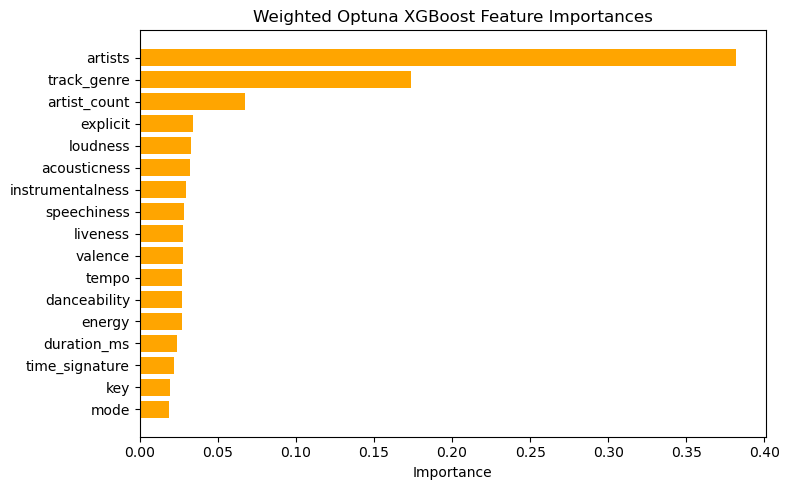

In [171]:
# Plot feature importances

sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 5))
plt.barh(feat_names[sorted_idx], importances[sorted_idx], color="orange")
plt.title("Weighted Optuna XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [172]:
# Pick top N
top_n = 13
top_features = feat_imp_df.head(top_n)['feature'].tolist()
print("Top features:", top_features)

Top features: ['artists', 'track_genre', 'artist_count', 'explicit', 'loudness', 'acousticness', 'instrumentalness', 'speechiness', 'liveness', 'valence', 'tempo', 'danceability', 'energy']


In [174]:
# Subset datasets
X_train_top = X_train_encoded[top_features]
X_valid_top = X_valid_encoded[top_features]

# Recompute weights (same as before)
y_bins_top = pd.qcut(y_train, q=10, duplicates='drop')
sample_weights_top = compute_sample_weight(class_weight='balanced', y=y_bins_top)

# Retrain XGBoost on top features
xgb_top = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
xgb_top.fit(X_train_top, y_train, sample_weight=sample_weights_top)

# Predict and evaluate
y_pred_top = xgb_top.predict(X_valid_top)
rmse_top = root_mean_squared_error(y_valid, y_pred_top)
print(f"RMSE using top {top_n} features: {rmse_top:.4f}")

RMSE using top 13 features: 14.3893


##### Classifier as regressor

In [153]:
import xgboost as xgb

import numpy as np

# === Step 1: Convert y to integers (should already be, but just in case)
y_train_cls = y_train.astype(int)
y_valid_cls = y_valid.astype(int)

# === Step 2: Train XGBClassifier
clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=101,  # 0 to 100 inclusive
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train_encoded, y_train_cls)

# === Step 3: Predict class probabilities
probs = clf.predict_proba(X_valid_encoded)  # shape: (n_samples, 101)

# === Step 4: Convert to expected value
classes = np.arange(101)
y_pred_expected = np.dot(probs, classes)

# === Step 5: Evaluate RMSE
rmse_cls = root_mean_squared_error(y_valid, y_pred_expected)
print(f"Classifier-as-Regressor RMSE: {rmse_cls:.4f}")

Classifier-as-Regressor RMSE: 15.3253


##### Parameters seacrh with optuna using weights

In [154]:
from sklearn.utils.class_weight import compute_sample_weight
import pandas as pd

# Bin y into quantiles
y_bins_cls = pd.qcut(y_train_cls, q=10, duplicates='drop')

# Compute balanced weights
sample_weights_cls = compute_sample_weight(class_weight='balanced', y=y_bins_cls)

In [157]:
import optuna
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

def objective_classifier_weighted(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'objective': 'multi:softprob',
        'num_class': 101,
        'n_jobs': -1,
        'random_state': 42
    }

    clf = xgb.XGBClassifier(**params)

    clf.fit(X_train_encoded, y_train_cls, sample_weight=sample_weights_cls)

    probs = clf.predict_proba(X_valid_encoded)
    classes = np.arange(101)
    y_pred_expected = np.dot(probs, classes)

    rmse = root_mean_squared_error(y_valid_cls, y_pred_expected)
    return rmse

In [158]:
import time

start = time.time()
study_cls_weighted = optuna.create_study(direction="minimize")
study_cls_weighted.optimize(objective_classifier_weighted, n_trials=50, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-21 11:12:49,203] A new study created in memory with name: no-name-bae7498c-8216-4a59-8f2e-b86d724c1b85


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-21 11:16:20,055] Trial 0 finished with value: 14.948106724536153 and parameters: {'n_estimators': 730, 'max_depth': 12, 'learning_rate': 0.11290881612158435, 'subsample': 0.5776036516167748, 'colsample_bytree': 0.8392051665982853, 'reg_alpha': 3.956792928285015, 'reg_lambda': 1.5736532570671025}. Best is trial 0 with value: 14.948106724536153.
[I 2025-04-21 11:17:43,055] Trial 1 finished with value: 15.253228226136825 and parameters: {'n_estimators': 528, 'max_depth': 4, 'learning_rate': 0.2541190386168017, 'subsample': 0.6148374328546546, 'colsample_bytree': 0.8113190059655679, 'reg_alpha': 4.014075128293111, 'reg_lambda': 1.6599446062736156}. Best is trial 0 with value: 14.948106724536153.
[I 2025-04-21 11:18:29,151] Trial 2 finished with value: 15.0377200520785 and parameters: {'n_estimators': 164, 'max_depth': 9, 'learning_rate': 0.26188886786366755, 'subsample': 0.5286093981738658, 'colsample_bytree': 0.5243901324607958, 'reg_alpha': 1.346731637645688, 'reg_lambda': 2.7

In [159]:
print(f"\nOptuna Classifier (weighted) RMSE: {study_cls_weighted.best_value:.4f}")
print("Best hyperparameters:", study_cls_weighted.best_params)


Optuna Classifier (weighted) RMSE: 14.9305
Best hyperparameters: {'n_estimators': 226, 'max_depth': 12, 'learning_rate': 0.09720843878120394, 'subsample': 0.7168825668546693, 'colsample_bytree': 0.7017906462033479, 'reg_alpha': 1.3302252573136144, 'reg_lambda': 0.9105815364983055}


#### RandomForest + Optuna + Sample Weights

In [162]:
from sklearn.utils.class_weight import compute_sample_weight

y_bins_rf = pd.qcut(y_train, q=10, duplicates='drop')
sample_weights_rf = compute_sample_weight(class_weight='balanced', y=y_bins_rf)

In [289]:
import optuna
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def objective_rf_weighted(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'n_jobs': -1,
        'random_state': 42
    }

    model = RandomForestRegressor(**params)
    model.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)

    y_pred = model.predict(X_valid_encoded)
    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [163]:
import time

start = time.time()
study_rf_weighted = optuna.create_study(direction="minimize")
study_rf_weighted.optimize(objective_rf_weighted, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-21 16:01:27,878] A new study created in memory with name: no-name-2cf7ea14-05ea-4d07-8e25-94472f1bef57


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-21 16:01:31,998] Trial 0 finished with value: 16.33417501439968 and parameters: {'n_estimators': 617, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 16.33417501439968.
[I 2025-04-21 16:02:21,747] Trial 1 finished with value: 15.120218051481618 and parameters: {'n_estimators': 582, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 1 with value: 15.120218051481618.
[I 2025-04-21 16:02:31,018] Trial 2 finished with value: 15.202302877670286 and parameters: {'n_estimators': 436, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 15.120218051481618.
[I 2025-04-21 16:02:42,680] Trial 3 finished with value: 15.204415054329582 and parameters: {'n_estimators': 498, 'max_depth': 36, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 15.120218051481618.
[

In [164]:
print(f"\nWeighted RandomForest RMSE: {study_rf_weighted.best_value:.4f}")
print("Best hyperparameters:", study_rf_weighted.best_params)


Weighted RandomForest RMSE: 14.8372
Best hyperparameters: {'n_estimators': 239, 'max_depth': 46, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


#### Blending two best

In [165]:
# Recombine X and y
X_full = pd.concat([X_train_encoded, X_valid_encoded])
y_full = pd.concat([y_train, y_valid])

# Recompute sample weights
from sklearn.utils.class_weight import compute_sample_weight
y_bins_full = pd.qcut(y_full, q=10, duplicates='drop')
sample_weights_full = compute_sample_weight(class_weight='balanced', y=y_bins_full)

# Re-train best XGBoost
xgb_model = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
xgb_model.fit(X_full, y_full, sample_weight=sample_weights_full)

# Re-train best RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    **study_rf_weighted.best_params,
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_full, y_full, sample_weight=sample_weights_full)

RandomForestRegressor(max_depth=46, max_features='sqrt', min_samples_split=4,
                      n_estimators=239, n_jobs=-1, random_state=42)

In [166]:
# Predict from both models
xgb_preds = xgb_model.predict(X_test_encoded)
rf_preds = rf_model.predict(X_test_encoded)

# Blend: simple average
blended_preds = (xgb_preds + rf_preds) / 2

In [168]:
submission_blended = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": blended_preds
})
submission_blended.to_csv("submission_blended.csv", index=False)

### LightGBM

In [179]:
import lightgbm as lgb
import optuna
import numpy as np

def objective_lgb_weighted(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train_encoded, y_train,
        sample_weight=sample_weights_rf,  # you already computed this earlier
        eval_set=[(X_valid_encoded, y_valid)],
        eval_metric='rmse'
    )

    y_pred = model.predict(X_valid_encoded)
    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [180]:
import time

start = time.time()
study_lgb_weighted = optuna.create_study(direction="minimize")
study_lgb_weighted.optimize(objective_lgb_weighted, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-21 20:44:06,497] A new study created in memory with name: no-name-c0d42abb-e4b7-4247-b220-6a0e2231ea9a


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 64259, number of used features: 17
[LightGBM] [Info] Start training from score 35.657496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [181]:

print(f"LightGBM RMSE (weighted): {study_lgb_weighted.best_value:.4f}")
print("Best hyperparameters:", study_lgb_weighted.best_params)


\LightGBM RMSE (weighted): 14.5193
Best hyperparameters: {'n_estimators': 979, 'max_depth': 11, 'learning_rate': 0.08262948978332867, 'num_leaves': 173, 'min_child_samples': 5, 'subsample': 0.9207363108652316, 'colsample_bytree': 0.5226000568821729, 'reg_alpha': 9.702635016746907, 'reg_lambda': 3.1503175011030473}


#### Review Parameter windows

In [183]:
y_bins_q20 = pd.qcut(y_train, q=20, duplicates='drop')
sample_weights_q20 = compute_sample_weight(class_weight='balanced', y=y_bins_q20)

In [184]:
def objective_lgb_weighted_expanded(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth', 6, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 50, 512),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 20.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 20.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train_encoded, y_train,
        sample_weight=sample_weights_q20  # Replace this with q=10 or q=20 bins
    )

    y_pred = model.predict(X_valid_encoded)
    rmse = root_mean_squared_error(y_valid, y_pred)
    return rmse

In [185]:
import time

start = time.time()
study_lgb_expanded = optuna.create_study(direction="minimize")
study_lgb_expanded.optimize(objective_lgb_weighted_expanded, n_trials=150, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-21 21:01:58,001] A new study created in memory with name: no-name-3b0127af-37b6-4f2d-8616-2fef3e04dfee


  0%|          | 0/150 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 64259, number of used features: 17
[LightGBM] [Info] Start training from score 37.433285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

####  Weighted Blend: 70% XGBoost + 30% LightGBM

In [200]:
# Train best XGBoost model
xgb_blend = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
xgb_blend.fit(X_full, y_full, sample_weight=sample_weights_full)

# Train best LightGBM model
lgb_blend = lgb.LGBMRegressor(
    **study_lgb_expanded.best_params,
    n_jobs=-1,
    random_state=42
)
lgb_blend.fit(X_full, y_full, sample_weight=sample_weights_full)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 75599, number of used features: 17
[LightGBM] [Info] Start training from score 35.665371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(colsample_bytree=0.44057900232415004,
              learning_rate=0.034808375452597504, max_depth=24,
              min_child_samples=37, n_estimators=1034, n_jobs=-1,
              num_leaves=381, random_state=42, reg_alpha=7.073496076981297,
              reg_lambda=14.345516541360958, subsample=0.6947884038152203)

In [256]:
# Get predictions
xgb_preds = xgb_blend.predict(X_test_encoded)
lgb_preds = lgb_blend.predict(X_test_encoded)

# Weighted average
blended_preds = 0.7 * xgb_preds + 0.3 * lgb_preds
blended_preds = np.clip(blended_preds, 0, 100).astype(int)

In [ ]:
submission_blended = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": blended_preds
})
submission_blended.to_csv("submission_xgb70_lgb30.csv", index=False)

####  Weighted Blend: 60% XGBoost + 40% LightGBM

In [189]:
# Weighted average
blended_preds6040 = 0.6 * xgb_preds + 0.4 * lgb_preds
blended_preds6040 = np.clip(blended_preds6040, 0, 100).astype(int)

In [190]:
submission_blended6040 = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": blended_preds6040
})
submission_blended6040.to_csv("submission_xgb60_lgb40.csv", index=False)

In [191]:
# Weighted average
blended_preds5050 = 0.5 * xgb_preds + 0.5 * lgb_preds
blended_preds5050 = np.clip(blended_preds5050, 0, 100).astype(int)

In [192]:
submission_blended5050 = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": blended_preds5050
})
submission_blended5050.to_csv("submission_xgb50_lgb50.csv", index=False)

#### triple threat ensemble!

In [193]:
blended_preds_3 = (
    0.6 * xgb_preds +
    0.3 * lgb_preds +
    0.1 * rf_preds
)
blended_preds_3 = np.clip(blended_preds_3, 0, 100).astype(int)

In [194]:
submission_blended_3 = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": blended_preds_3
})
submission_blended_3.to_csv("submission_xgb60_lgb30_rf10.csv", index=False)

## Pruebas Adicionales

#### Add Interaction Features
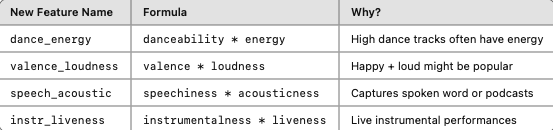


In [ ]:
# Definición de pares de interacciones
interaction_pairs = [
    ("danceability", "energy", "dance_energy"),
    ("valence", "loudness", "valence_loudness"),
    ("speechiness", "acousticness", "speech_acoustic"),
    ("instrumentalness", "liveness", "instr_liveness")
]

def add_interactions(df):
    for f1, f2, name in interaction_pairs:
        df[name] = df[f1] * df[f2]
    return df

In [196]:
# Preserve originals
X_train_encoded_orig = X_train_encoded.copy()
X_valid_encoded_orig = X_valid_encoded.copy()
X_test_encoded_orig  = X_test_encoded.copy()

In [257]:

# Apply to encoded versions
X_train_encoded = add_interactions(X_train_encoded)
X_valid_encoded = add_interactions(X_valid_encoded)
X_test_encoded  = add_interactions(X_test_encoded)

In [198]:
xgb_model_interactions = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
xgb_model_interactions.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)

# Evaluate
y_pred_int = xgb_model_interactions.predict(X_valid_encoded)
rmse_int = root_mean_squared_error(y_valid, y_pred_int)
print(f"RMSE with interaction terms: {rmse_int:.4f}")

RMSE with interaction terms: 14.3061


In [199]:
# Get feature importances
importances = xgb_model_interactions.feature_importances_
feature_names = X_train_encoded.columns

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top features
feat_imp_df.head(20)

feature  importance
0            artists    0.391812
15       track_genre    0.138824
16      artist_count    0.053079
2           explicit    0.030886
10  instrumentalness    0.027324
20    instr_liveness    0.025855
17      dance_energy    0.025654
19   speech_acoustic    0.025377
12           valence    0.024991
9       acousticness    0.024659
18  valence_loudness    0.024652
11          liveness    0.023495
3       danceability    0.023332
4             energy    0.023219
6           loudness    0.022655
8        speechiness    0.022162
13             tempo    0.021463
1        duration_ms    0.020988
14    time_signature    0.017160
5                key    0.016475

#### Add cyclical encoding for key, mode, time_signature

In [203]:
def add_cyclical_features(df):
    # 12 keys (0–11)
    df['key_sin'] = np.sin(2 * np.pi * df['key'] / 12)
    df['key_cos'] = np.cos(2 * np.pi * df['key'] / 12)

    # 2 modes (0 = minor, 1 = major)
    df['mode_sin'] = np.sin(2 * np.pi * df['mode'] / 2)
    df['mode_cos'] = np.cos(2 * np.pi * df['mode'] / 2)

    # 7 time signatures (0–6), or clip to max = 6
    df['time_sig_sin'] = np.sin(2 * np.pi * df['time_signature'].clip(0, 6) / 7)
    df['time_sig_cos'] = np.cos(2 * np.pi * df['time_signature'].clip(0, 6) / 7)
    return df

In [ ]:
# Optional: preserve again if needed
X_train_encoded_orig2 = X_train_encoded.copy()
X_valid_encoded_orig2 = X_valid_encoded.copy()
X_test_encoded_orig2  = X_test_encoded.copy()


In [258]:

# Add cyclical features
X_train_encoded = add_cyclical_features(X_train_encoded)
X_valid_encoded = add_cyclical_features(X_valid_encoded)
X_test_encoded  = add_cyclical_features(X_test_encoded)

In [207]:
xgb_cyclic = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_cyclic.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5107545718625804, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.015304080470964711, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=911, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [208]:

y_pred_cyclic = xgb_cyclic.predict(X_valid_encoded)
rmse_cyclic = root_mean_squared_error(y_valid, y_pred_cyclic)
print(f"RMSE with cyclical features added: {rmse_cyclic:.4f}")

RMSE with cyclical features added: 14.3215


In [209]:
importances = xgb_cyclic.feature_importances_
feature_names = X_train_encoded.columns

feat_imp_cyclic_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top 25 features
feat_imp_cyclic_df.head(25)

feature  importance
0            artists    0.354991
15       track_genre    0.144191
16      artist_count    0.053883
20    instr_liveness    0.026828
2           explicit    0.026750
9       acousticness    0.023223
17      dance_energy    0.022856
18  valence_loudness    0.022770
12           valence    0.022208
19   speech_acoustic    0.021978
8        speechiness    0.021912
10  instrumentalness    0.021588
4             energy    0.021112
6           loudness    0.020879
21           key_sin    0.020114
11          liveness    0.020011
22           key_cos    0.019748
3       danceability    0.019627
24          mode_cos    0.019162
13             tempo    0.018997
1        duration_ms    0.018430
14    time_signature    0.017683
7               mode    0.015166
23          mode_sin    0.013512
5                key    0.012381

#### Add ciclyclal interactions

In [272]:
def add_cyclical_interactions(df):
    df['key_loudness'] = df['key_sin'] * df['loudness']
    df['mode_valence'] = df['mode_cos'] * df['valence']
    df['key_mode_energy'] = df['key_cos'] * df['mode_cos'] * df['energy']
    return df

# Apply to all sets
X_train_encoded = add_cyclical_interactions(X_train_encoded)
X_valid_encoded = add_cyclical_interactions(X_valid_encoded)
X_test_encoded  = add_cyclical_interactions(X_test_encoded)

In [259]:
cols_to_drop = ['key', 'mode', 'time_signature'] 

X_train_encoded = X_train_encoded.drop(columns=cols_to_drop)
X_valid_encoded = X_valid_encoded.drop(columns=cols_to_drop)
X_test_encoded  = X_test_encoded.drop(columns=cols_to_drop)

In [212]:
xgb_cyclic_interactions = xgb.XGBRegressor(
    **study_raw_weighted.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_cyclic_interactions.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)

y_pred_cycint = xgb_cyclic_interactions.predict(X_valid_encoded)
rmse_cycint = root_mean_squared_error(y_valid, y_pred_cycint)
print(f"RMSE with cyclical interactions + dropped raw key/mode/time_signature: {rmse_cycint:.4f}")

RMSE with cyclical interactions + dropped raw key/mode/time_signature: 14.2866


#### Add Interactions to LightGBM

In [213]:
lgb_model_cyclic = lgb.LGBMRegressor(
    **study_lgb_expanded.best_params,
    n_jobs=-1,
    random_state=42
)

lgb_model_cyclic.fit(
    X_train_encoded, y_train,
    sample_weight=sample_weights_rf  
)

# Predict and evaluate
y_pred_lgb_cyclic = lgb_model_cyclic.predict(X_valid_encoded)
rmse_lgb_cyclic = root_mean_squared_error(y_valid, y_pred_lgb_cyclic)
print(f"LightGBM RMSE with cyclical interactions: {rmse_lgb_cyclic:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4757
[LightGBM] [Info] Number of data points in the train set: 64259, number of used features: 25
[LightGBM] [Info] Start training from score 35.657496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

## Reentrenando todos los modelos con estos nuevos features

1. Optuna Objective for XGBoost (enhanced)

In [224]:
def objective_xgb_enhanced(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1200),
        'max_depth': trial.suggest_int('max_depth', 12, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'objective': 'reg:squarederror',
        'random_state': 42,
        'n_jobs': -1
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)
    y_pred = model.predict(X_valid_encoded)
    return root_mean_squared_error(y_valid, y_pred)

2. Optuna Objective for RandomForest (enhanced)

In [226]:
def objective_rf_enhanced(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1200),
        'max_depth': trial.suggest_int('max_depth',12, 40),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params)
    model.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)
    y_pred = model.predict(X_valid_encoded)
    return root_mean_squared_error(y_valid, y_pred)

3. Optuna Objective for LightGBM (enhanced)

In [227]:
def objective_lgb_enhanced(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1200),
        'max_depth': trial.suggest_int('max_depth', 12, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 50, 512),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train_encoded, y_train, sample_weight=sample_weights_rf)
    y_pred = model.predict(X_valid_encoded)
    return root_mean_squared_error(y_valid, y_pred)

In [225]:
import time

start = time.time()
study_xgb_enhanced = optuna.create_study(direction="minimize")
study_xgb_enhanced.optimize(objective_xgb_enhanced, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-22 10:10:48,463] A new study created in memory with name: no-name-2d1ede1b-de18-400d-a96f-25802687a9fa


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-22 10:11:19,217] Trial 0 finished with value: 14.704726679611404 and parameters: {'n_estimators': 588, 'max_depth': 16, 'learning_rate': 0.041308690394885446, 'subsample': 0.9628420042381234, 'colsample_bytree': 0.8437271637395825, 'reg_alpha': 6.694245060768362, 'reg_lambda': 3.2634499173448495}. Best is trial 0 with value: 14.704726679611404.
[I 2025-04-22 10:12:05,572] Trial 1 finished with value: 14.819741115899802 and parameters: {'n_estimators': 1091, 'max_depth': 18, 'learning_rate': 0.08147552240774948, 'subsample': 0.9777868921721349, 'colsample_bytree': 0.7236135013081728, 'reg_alpha': 2.5370191425407995, 'reg_lambda': 6.696573659357244}. Best is trial 0 with value: 14.704726679611404.
[I 2025-04-22 10:12:40,173] Trial 2 finished with value: 14.895626938203891 and parameters: {'n_estimators': 962, 'max_depth': 17, 'learning_rate': 0.10281538125767724, 'subsample': 0.8951033807053885, 'colsample_bytree': 0.901103534171968, 'reg_alpha': 7.584838335798279, 'reg_lambda

In [228]:
print(f"XGB Enhanced RMSE (weighted): {study_xgb_enhanced.best_value:.4f}")
print("Best hyperparameters:", study_xgb_enhanced.best_params)

XGB Enhanced RMSE (weighted): 14.1539
Best hyperparameters: {'n_estimators': 835, 'max_depth': 18, 'learning_rate': 0.011385936986454792, 'subsample': 0.9975707008201606, 'colsample_bytree': 0.501395659306636, 'reg_alpha': 4.240404901875107, 'reg_lambda': 5.7634326711384265}


In [229]:
import time

start = time.time()
study_rf_enhanced = optuna.create_study(direction="minimize")
study_rf_enhanced.optimize(objective_rf_enhanced, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-22 11:28:05,934] A new study created in memory with name: no-name-3e6b2d4d-780f-4170-a9bd-bac272bb2092


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-04-22 11:31:27,203] Trial 0 finished with value: 15.153499663084988 and parameters: {'n_estimators': 1107, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 15.153499663084988.
[I 2025-04-22 11:32:06,733] Trial 1 finished with value: 15.092923382290275 and parameters: {'n_estimators': 1126, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 15.092923382290275.
[I 2025-04-22 11:32:30,446] Trial 2 finished with value: 15.189936235418264 and parameters: {'n_estimators': 843, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 15.092923382290275.
[I 2025-04-22 11:32:43,883] Trial 3 finished with value: 15.509065533698504 and parameters: {'n_estimators': 494, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 15.092923382290

In [230]:
print(f"RandomForest Enhanced RMSE (weighted): {study_rf_enhanced.best_value:.4f}")
print("Best hyperparameters:", study_rf_enhanced.best_params)

RandomForest Enhanced RMSE (weighted): 14.6323
Best hyperparameters: {'n_estimators': 1172, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [231]:
import time

start = time.time()
study_lgb_enhanced = optuna.create_study(direction="minimize")
study_lgb_enhanced.optimize(objective_lgb_enhanced, n_trials=100, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")

[I 2025-04-22 12:50:04,984] A new study created in memory with name: no-name-54ef071d-6888-43af-8fbf-4a16099fc78f


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4757
[LightGBM] [Info] Number of data points in the train set: 64259, number of used features: 25
[LightGBM] [Info] Start training from score 35.657496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [232]:
print(f"LGBM Enhanced RMSE (weighted): {study_lgb_enhanced.best_value:.4f}")
print("Best hyperparameters:", study_lgb_enhanced.best_params)

LGBM Enhanced RMSE (weighted): 14.5263
Best hyperparameters: {'n_estimators': 1166, 'max_depth': 20, 'learning_rate': 0.11881276192449935, 'num_leaves': 116, 'min_child_samples': 23, 'subsample': 0.5867587003564629, 'colsample_bytree': 0.5414892706553335, 'reg_alpha': 9.915342613500314, 'reg_lambda': 7.672907257136779}


#### Mix 85/15 dos mejores

In [282]:
# Train best XGBoost model
xgb_blend_enhanced = xgb.XGBRegressor(
    **study_xgb_enhanced.best_params,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
xgb_blend_enhanced.fit(X_full, y_full, sample_weight=sample_weights_full)

# Train best LightGBM model
lgb_blend_enhanced = lgb.LGBMRegressor(
    **study_lgb_enhanced.best_params,
    n_jobs=-1,
    random_state=42
)
lgb_blend_enhanced.fit(X_full, y_full, sample_weight=sample_weights_full)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4758
[LightGBM] [Info] Number of data points in the train set: 75599, number of used features: 25
[LightGBM] [Info] Start training from score 35.665371


LGBMRegressor(colsample_bytree=0.5414892706553335,
              learning_rate=0.11881276192449935, max_depth=20,
              min_child_samples=23, n_estimators=1166, n_jobs=-1,
              num_leaves=116, random_state=42, reg_alpha=9.915342613500314,
              reg_lambda=7.672907257136779, subsample=0.5867587003564629)

In [283]:
xgb_enh_preds_test = xgb_blend_enhanced.predict(X_test_encoded)
lgb_enh_preds_test = lgb_blend_enhanced.predict(X_test_encoded)

In [285]:
blended_preds = 0.85 * xgb_enh_preds_test + 0.15 * lgb_enh_preds_test
blended_preds = np.clip(blended_preds, 0, 100)

submission_blended = pd.DataFrame({
    "Id": X_test.index,
    "popularity": blended_preds
})
submission_blended.to_csv("submission_blended_xgb85_lgb15_enh.csv", index=False)

In [286]:
blended_preds = 0.65 * xgb_enh_preds_test + 0.35 * lgb_enh_preds_test
blended_preds = np.clip(blended_preds, 0, 100)

submission_blended = pd.DataFrame({
    "Id": X_test.index,
    "popularity": blended_preds
})
submission_blended.to_csv("submission_blended_xgb65_lgb35_enh.csv", index=False)

### Saving the best **SOLO** model so far

In [273]:
# Combine training and validation targets
X_full = pd.concat([X_train_encoded, X_valid_encoded])
y_full = pd.concat([y_train, y_valid])

In [274]:
xgb_best_enhanced = xgb.XGBRegressor(
    n_estimators=835,
    max_depth=18,
    learning_rate=0.01138596,
    subsample=0.99577,
    colsample_bytree=0.5014,
    reg_alpha=4.24,
    reg_lambda=5.76,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)


In [275]:

xgb_best_enhanced.fit(X_full, y_full, sample_weight=sample_weights_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5014, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01138596,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=18, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=835, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [276]:
xgb_best_enhanced_preds = xgb_best_enhanced.predict(X_test_encoded)
xgb_best_enhanced_preds = np.clip(xgb_best_enhanced_preds, 0, 100)
submission_xgb_enhanced = pd.DataFrame({
    "Id": X_test.index,
    "Popularity": xgb_best_enhanced_preds
})
submission_xgb_enhanced.to_csv("submission_xgb_enhanced1.csv", index=False) # nota el primero que salve tenia las ciclicas pero no las interacciones

In [277]:
import joblib
joblib.dump(xgb_best_enhanced, "model/xgb_best_enhanced_model.pkl") # nota el primero que salve tenia las ciclicas pero no las interacciones

['model/xgb_best_enhanced_model.pkl']

### Another try with Classifier as regressor

In [278]:

def objective_classifier_enhanced(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1200),
        'max_depth': trial.suggest_int('max_depth', 12, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'objective': 'multi:softprob',
        'num_class': 101,
        'n_jobs': -1,
        'random_state': 42
    }

    clf = xgb.XGBClassifier(**params)

    clf.fit(X_train_encoded, y_train_cls, sample_weight=sample_weights_cls)

    probs = clf.predict_proba(X_valid_encoded)
    classes = np.arange(101)
    y_pred_expected = np.dot(probs, classes)

    rmse = root_mean_squared_error(y_valid_cls, y_pred_expected)
    return rmse



In [279]:

import time

start = time.time()
study_cls_enhanced = optuna.create_study(direction="minimize")
study_cls_enhanced.optimize(objective_classifier_enhanced, n_trials=30, show_progress_bar=True)
end = time.time()
print(f"Tuning time: {(end - start)/60:.2f} minutes")


[I 2025-04-22 16:58:23,905] A new study created in memory with name: no-name-ab224bd1-035c-4f4e-bfd6-5fedf52b2be9


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-04-22 17:01:44,013] Trial 0 finished with value: 14.916828736753619 and parameters: {'n_estimators': 600, 'max_depth': 22, 'learning_rate': 0.20885424689275983, 'subsample': 0.9011163926066705, 'colsample_bytree': 0.8500925736680968, 'reg_alpha': 4.484196512614265, 'reg_lambda': 6.021792034285561}. Best is trial 0 with value: 14.916828736753619.
[I 2025-04-22 17:05:29,415] Trial 1 finished with value: 14.693465319465894 and parameters: {'n_estimators': 428, 'max_depth': 22, 'learning_rate': 0.1681555639065144, 'subsample': 0.8024218681265509, 'colsample_bytree': 0.5030044592227941, 'reg_alpha': 2.6351192199870876, 'reg_lambda': 3.5821762211804584}. Best is trial 1 with value: 14.693465319465894.
[I 2025-04-22 17:09:26,891] Trial 2 finished with value: 15.566839092128484 and parameters: {'n_estimators': 504, 'max_depth': 26, 'learning_rate': 0.022221681399318134, 'subsample': 0.8839138325195337, 'colsample_bytree': 0.5649123739625129, 'reg_alpha': 8.810117823686694, 'reg_lambda'

In [280]:
print(f"\nOptuna Classifier as Regressor RMSE: {study_cls_enhanced.best_value:.4f}")
print("Best hyperparameters:", study_cls_enhanced.best_params)


Optuna Classifier as Regressor RMSE: 14.6447
Best hyperparameters: {'n_estimators': 1183, 'max_depth': 18, 'learning_rate': 0.1604073723996211, 'subsample': 0.7053746975190007, 'colsample_bytree': 0.5498726226193833, 'reg_alpha': 2.748230881801342, 'reg_lambda': 6.323786178919493}


In [290]:
import session_info 
session_info.show(html=False)

-----
category_encoders   2.6.1
joblib              1.2.0
lightgbm            4.6.0
matplotlib          3.7.1
numpy               1.24.3
optuna              4.3.0
pandas              2.0.3
seaborn             0.12.2
session_info        1.0.0
sklearn             1.4.2
xgboost             2.1.1
-----
IPython             8.15.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
macOS-15.3.2-arm64-arm-64bit
-----
Session information updated at 2025-04-26 12:16


#### Modelo Liviano para API

In [364]:
# Carga de datos de archivo .csv
dataTraining1 = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting1 = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [365]:
dataTesting1.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [339]:
dataTraining1.head(3)

Unnamed: 0                track_id           artists        album_name  \
0           0  7hUhmkALyQ8SX9mJs5XI3D  Love and Rockets  Love and Rockets   
1           1  5x59U89ZnjZXuNAAlc8X1u  Filippa Giordano  Filippa Giordano   
2           2  70Vng5jLzoJLmeLu3ayBQq     Susumu Yokota            Symbol   

                               track_name  duration_ms  explicit  \
0                              Motorcycle       211533     False   
1  Addio del passato - From "La traviata"       196000     False   
2                      Purple Rose Minuet       216506     False   

   danceability  energy  key  ...  mode  speechiness  acousticness  \
0         0.305   0.849    9  ...     1       0.0549      0.000058   
1         0.287   0.190    7  ...     0       0.0370      0.930000   
2         0.583   0.509    1  ...     1       0.0362      0.777000   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640    0.320  141.793               4         goth   
1          0.000356    0.0834    0.133   83.685               4        opera   
2          0.202000    0.1150    0.544   90.459               3          idm   

  popularity  
0         22  
1         22  
2         37  

[3 rows x 21 columns]

In [340]:
columns_to_drop1 = ['track_id', 'Unnamed: 0', 'track_name', 'explicit', 'time_signature', 'key', 'mode']
data1 = dataTraining1.copy()
data1.drop(columns=columns_to_drop1, inplace=True)

In [341]:
data1.columns

Index(['artists', 'album_name', 'duration_ms', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_genre', 'popularity'],
      dtype='object')

In [342]:
columns_to_drop_t1 = ['track_id', 'track_name', 'explicit', 'time_signature', 'key', 'mode']
dataTesting1 = dataTesting1.drop(columns=columns_to_drop_t1)

In [343]:
# duplicate rows
duplicates = data1[data1.duplicated()]  
duplicate_count = duplicates.shape[0]

print("Number of duplicate rows:", duplicate_count)

#print(duplicates)

Number of duplicate rows: 303


In [344]:
data1 = data1.drop_duplicates()

In [345]:
categorical_columns = list(data1.select_dtypes(include=['object']).columns)
categorical_columns

['artists', 'album_name', 'track_genre']

In [346]:

data1[categorical_columns] = data1[categorical_columns].astype('category')
dataTesting1[categorical_columns] = dataTesting1[categorical_columns].astype('category')



In [347]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79497 entries, 0 to 79799
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artists           79497 non-null  category
 1   album_name        79497 non-null  category
 2   duration_ms       79497 non-null  int64   
 3   danceability      79497 non-null  float64 
 4   energy            79497 non-null  float64 
 5   loudness          79497 non-null  float64 
 6   speechiness       79497 non-null  float64 
 7   acousticness      79497 non-null  float64 
 8   instrumentalness  79497 non-null  float64 
 9   liveness          79497 non-null  float64 
 10  valence           79497 non-null  float64 
 11  tempo             79497 non-null  float64 
 12  track_genre       79497 non-null  category
 13  popularity        79497 non-null  int64   
dtypes: category(3), float64(9), int64(2)
memory usage: 10.3 MB


In [348]:
dataTesting1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34200 entries, 0 to 34199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artists           34199 non-null  category
 1   album_name        34199 non-null  category
 2   duration_ms       34200 non-null  int64   
 3   danceability      34200 non-null  float64 
 4   energy            34200 non-null  float64 
 5   loudness          34200 non-null  float64 
 6   speechiness       34200 non-null  float64 
 7   acousticness      34200 non-null  float64 
 8   instrumentalness  34200 non-null  float64 
 9   liveness          34200 non-null  float64 
 10  valence           34200 non-null  float64 
 11  tempo             34200 non-null  float64 
 12  track_genre       34200 non-null  category
dtypes: category(3), float64(9), int64(1)
memory usage: 4.3 MB


In [353]:
X1 = data1.drop(columns='popularity')
y1 = data1['popularity']

In [359]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from lightgbm import LGBMRegressor
simple_model = LGBMRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

simple_model.fit(
    X_train1, y_train1,
    eval_set=[(X_valid1, y_valid1)],
    categorical_feature=categorical_columns,
)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13017
[LightGBM] [Info] Number of data points in the train set: 63597, number of used features: 13
[LightGBM] [Info] Start training from score 33.382943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMRegressor(max_depth=4, random_state=42)

In [361]:
y_pred = simple_model.predict(X_valid1)
rmse = root_mean_squared_error(y_valid1, y_pred)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 13.2770


In [362]:
import joblib
joblib.dump(simple_model, "model/lgbm_simple_model.pkl")

['model/lgbm_simple_model.pkl']

In [363]:

session_info.show(html=False)

-----
category_encoders   2.6.1
joblib              1.2.0
lightgbm            4.6.0
matplotlib          3.7.1
numpy               1.24.3
optuna              4.3.0
pandas              2.0.3
seaborn             0.12.2
session_info        1.0.0
sklearn             1.4.2
xgboost             2.1.1
-----
IPython             8.15.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
macOS-15.3.2-arm64-arm-64bit
-----
Session information updated at 2025-04-26 15:30
